In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
data=pd.read_csv('airline_passenger_satisfaction.csv')

# Exploring our Data

In [3]:
data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [4]:
data.shape

(129880, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

# Handling missing values

In [7]:
data = data.dropna()

In [8]:
data.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [9]:
d=pd.DataFrame(data.groupby(['Satisfaction'])['Satisfaction'].count())

In [10]:
d=pd.DataFrame(data.groupby(['Satisfaction'])['Satisfaction'].count())
prop_of_Satisfaction=[]
for val in np.sort(data['Satisfaction'].unique()):
    prop=d['Satisfaction'][val]/(d['Satisfaction'][1]+d['Satisfaction'][0])
    prop_of_Satisfaction.append({
        'Satisfaction':val,
        'proportion':prop
    })
prop_of_Satisfaction=pd.DataFrame(prop_of_Satisfaction)
prop_of_Satisfaction.sort_values('proportion',ascending=False,inplace=True)
prop_of_Satisfaction

,Satisfaction,proportion
0,Neutral or Dissatisfied,0.565501
1,Satisfied,0.434499


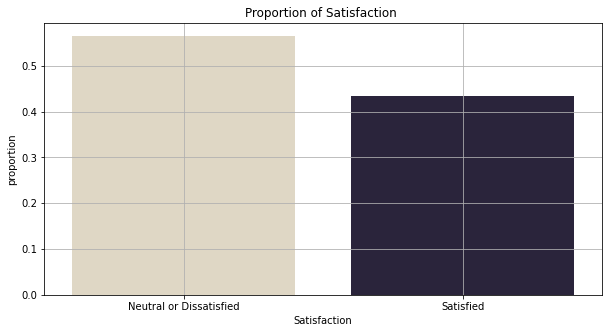

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_of_Satisfaction["Satisfaction"],y=prop_of_Satisfaction["proportion"],palette='ch:s=-.2,r=.6',order=prop_of_Satisfaction['Satisfaction'])
plt.title("Proportion of Satisfaction ")
plt.xlabel('Satisfaction')
plt.grid(True)
plt.show()

# Checking for outliers

In [12]:
data1 = data[['Departure and Arrival Time Convenience',
'Ease of Online Booking','Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',
'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']]

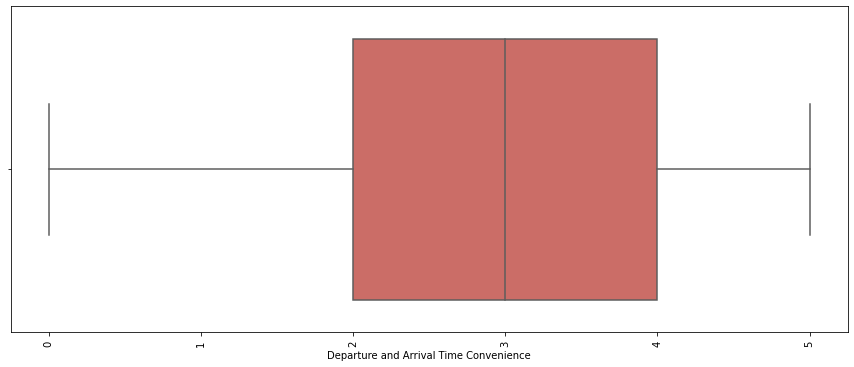

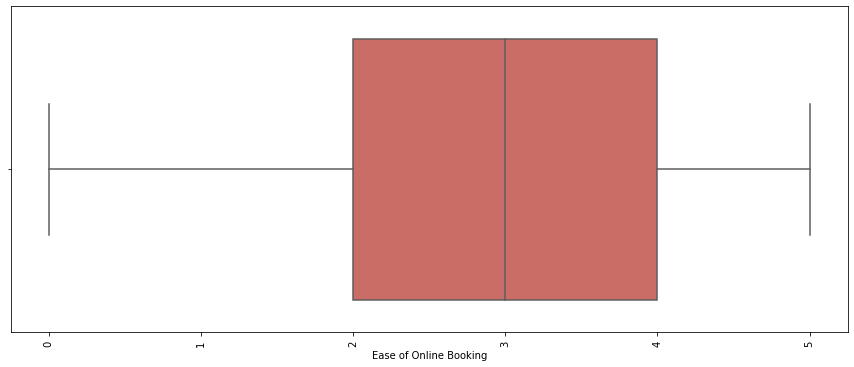

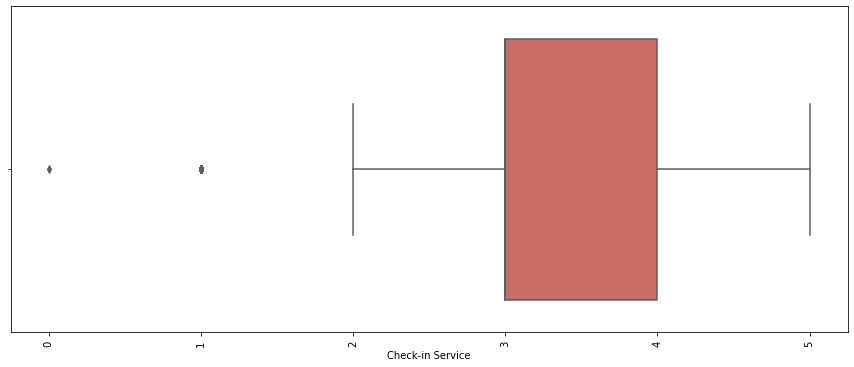

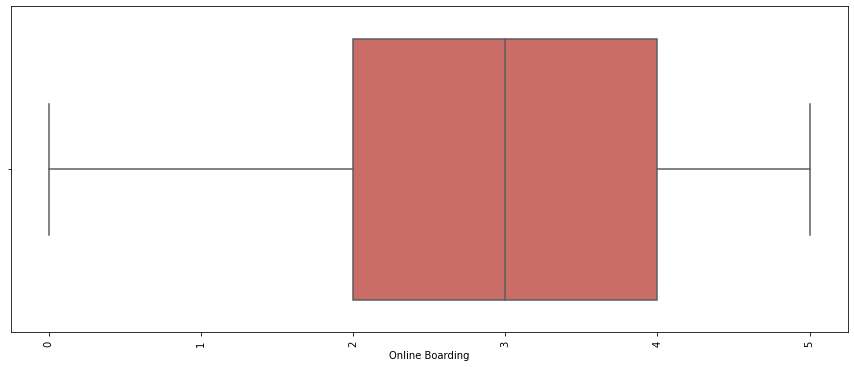

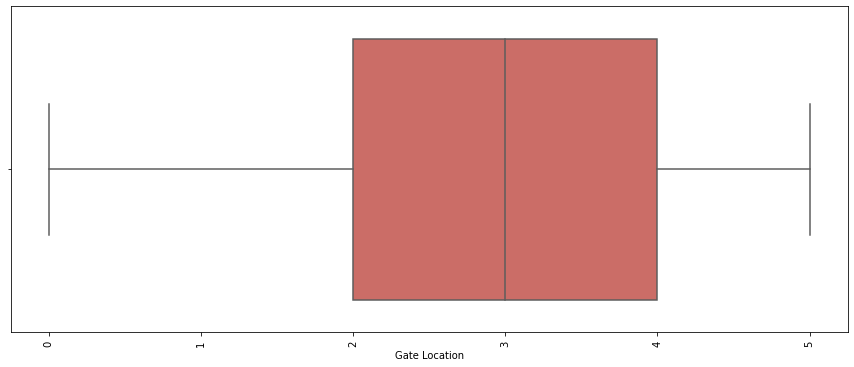

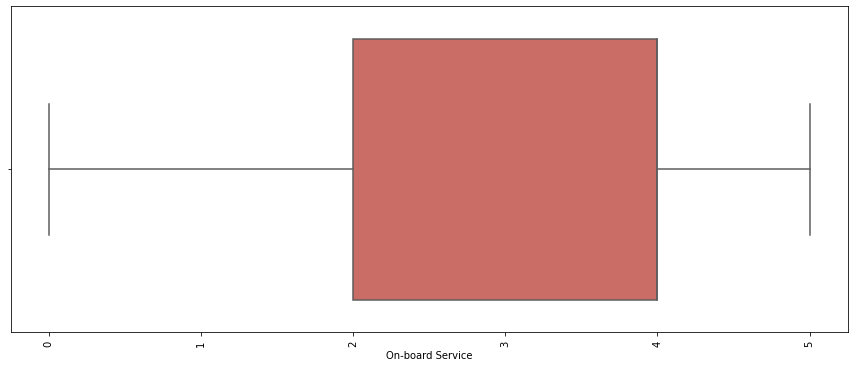

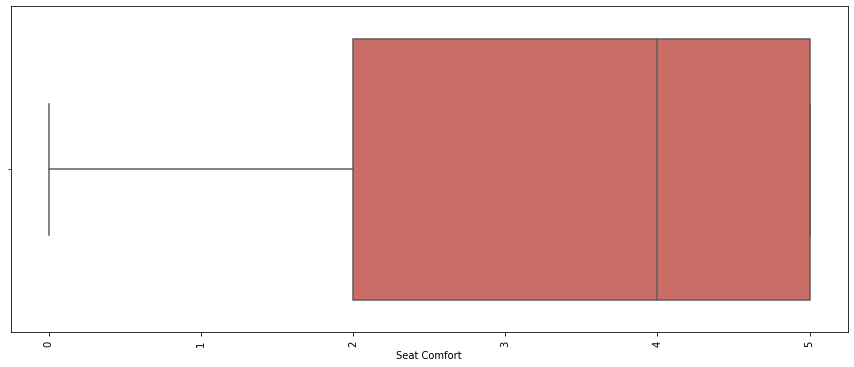

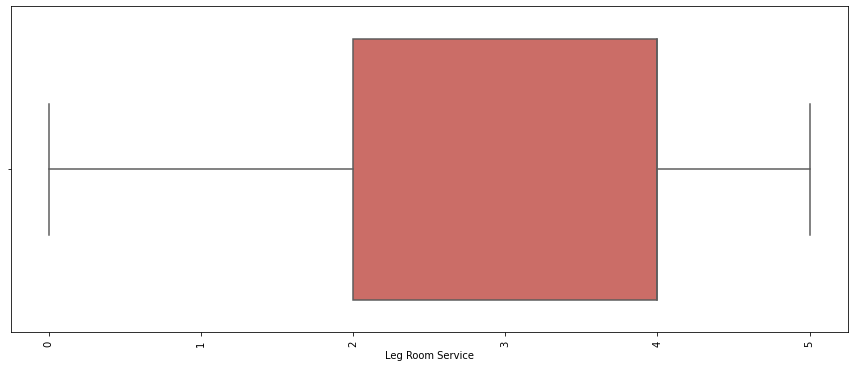

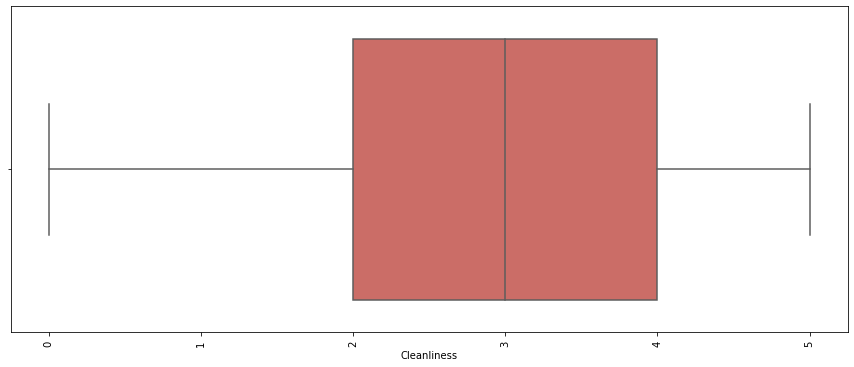

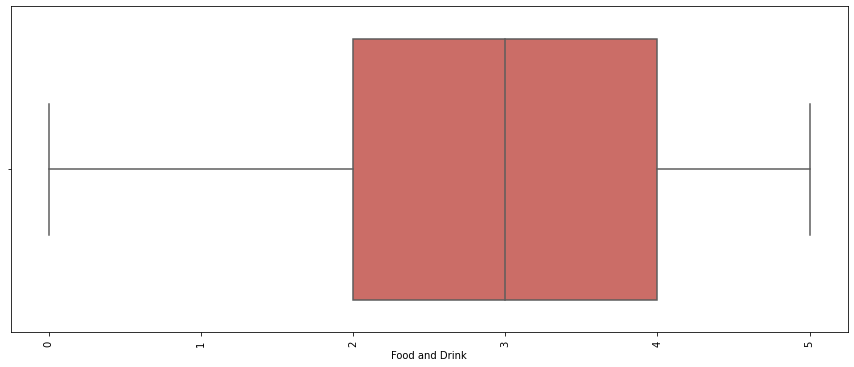

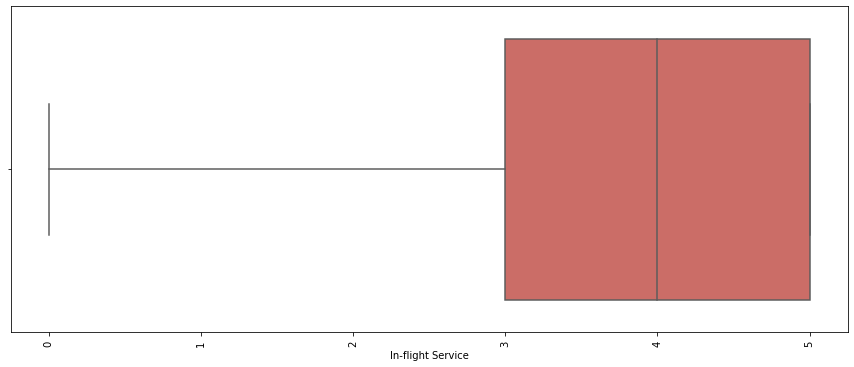

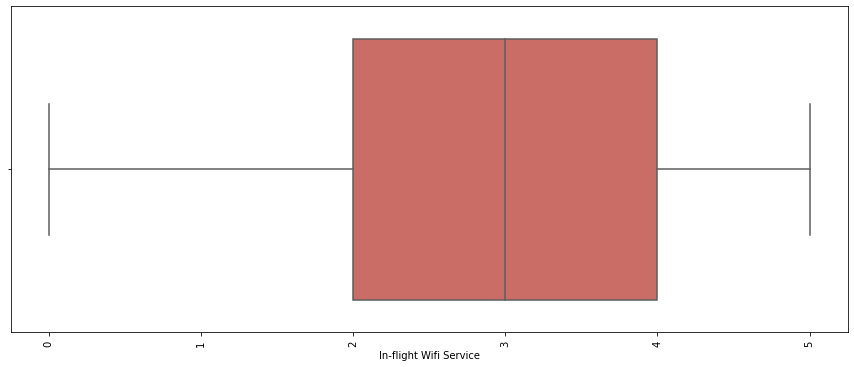

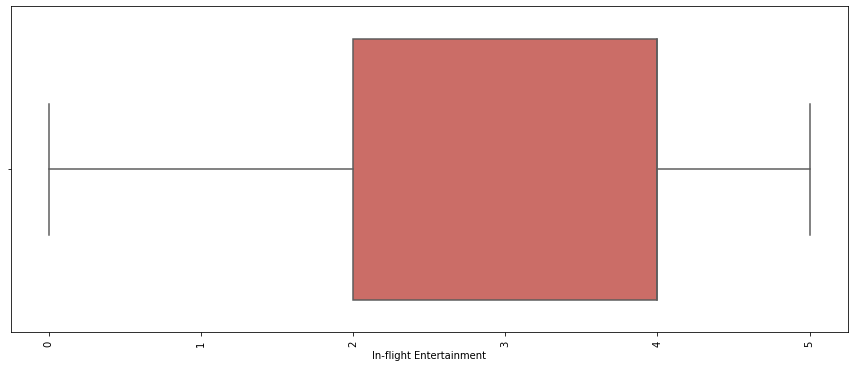

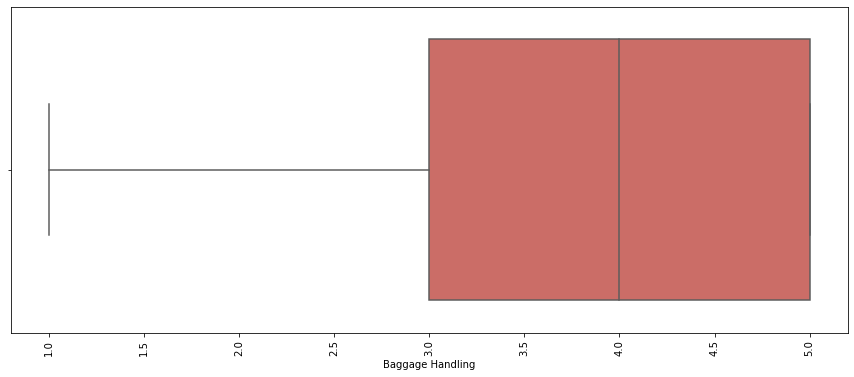

In [13]:
for j in data1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=data[j][1:], data=data.iloc[:1],
                order=data1[j][1:].value_counts().index,
                palette='hls')
    plt.xticks(rotation=90)
    plt.show()

# Encoding our data

In [14]:
columns= data[['Gender', 'Customer Type', 'Type of Travel','Class', 'Satisfaction']]

In [15]:
label_encoder = preprocessing.LabelEncoder()

In [16]:
columns = columns.apply(label_encoder.fit_transform)

In [17]:
columns.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,1,0,0,0,0
1,0,1,0,0,1
2,1,1,0,0,1
3,1,1,0,0,1
4,0,1,0,0,1


In [18]:
data[list(columns.columns)] = columns
data = data.apply(pd.to_numeric, errors='coerce')
data.head()

C:\Users\apeer\AppData\Local\Temp\ipykernel_16632\3517101466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[list(columns.columns)] = columns


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  int32  
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  int32  
 4   Type of Travel                          129487 non-null  int32  
 5   Class                                   129487 non-null  int32  
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

Text(0.5, 1.0, 'Correlation coefficient between different features and Satisfaction ')

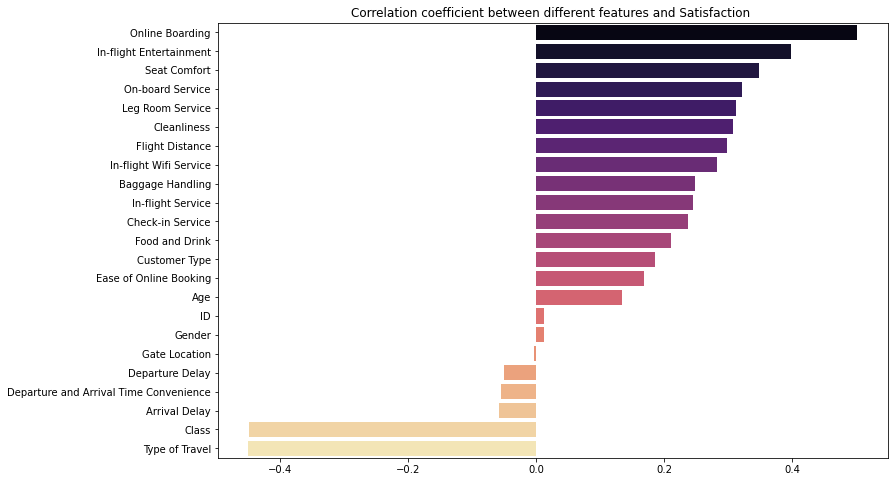

In [20]:
plt.figure(figsize=(12,8))
data_4 = data.corr()["Satisfaction"].sort_values(ascending=False)
indices = data_4.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data_4[i])
sns.barplot(x=corr, y=labels, palette='magma')
plt.title('Correlation coefficient between different features and Satisfaction ')

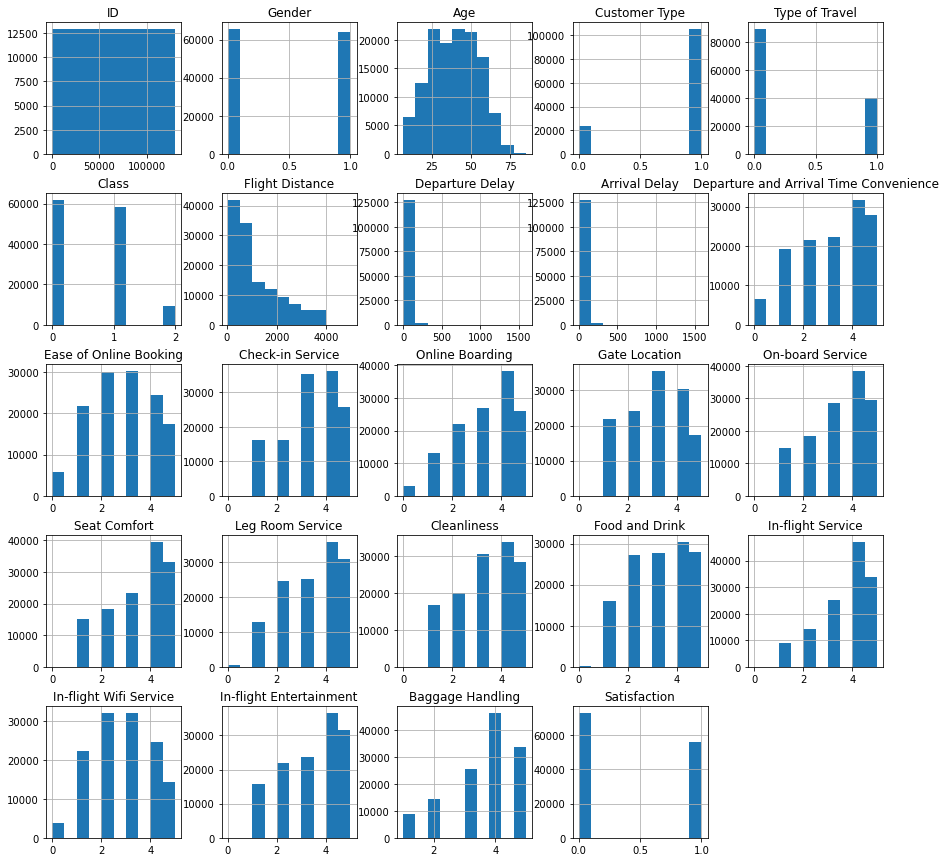

In [21]:
data.hist(figsize=(15,15))
plt.show()

# Spliting the Data

In [22]:
y =data.Satisfaction.to_numpy()
data.drop(columns=['ID', 'Satisfaction'], inplace=True)
X = data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.25 , random_state=42)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97115 entries, 64272 to 121958
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  97115 non-null  float64
 1   Age                                     97115 non-null  float64
 2   Customer Type                           97115 non-null  float64
 3   Type of Travel                          97115 non-null  float64
 4   Class                                   97115 non-null  float64
 5   Flight Distance                         97115 non-null  float64
 6   Departure Delay                         97115 non-null  float64
 7   Arrival Delay                           97115 non-null  float64
 8   Departure and Arrival Time Convenience  97115 non-null  float64
 9   Ease of Online Booking                  97115 non-null  float64
 10  Check-in Service                        97115 non-nul

# Appling the models WITHOUT Feature Selection

In [229]:
lr = LogisticRegression()

In [230]:
lr.fit(X_train , y_train)

LogisticRegression()

In [231]:
lr.score(X_train, y_train)

0.8746743551459609

In [232]:
from sklearn.metrics import mean_absolute_error
yhat = lr.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.127


In [1]:
kNN = KNeighborsClassifier(n_neighbors=12)

NameError: name 'KNeighborsClassifier' is not defined

In [234]:
kNN.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
kNN.score(X_train , y_train)

In [34]:
kNN.score(X_test, y_test)

0.9277462004201161

In [35]:
yhat = kNN.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.072


In [36]:
kNN = KNeighborsClassifier(n_neighbors=7)

In [37]:
kNN.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
kNN.score(X_train , y_train)

0.9446738402924368

In [39]:
kNN.score(X_test, y_test)

0.9291362906215248

In [40]:
yhat = kNN.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.071


# Using Feature selection technique [RFE]

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=21)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 21
Selected Features: [ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
fit

RFE(estimator=LogisticRegression(), n_features_to_select=21)

In [31]:
features = fit.transform(X)

In [32]:
d=pd.DataFrame(features)

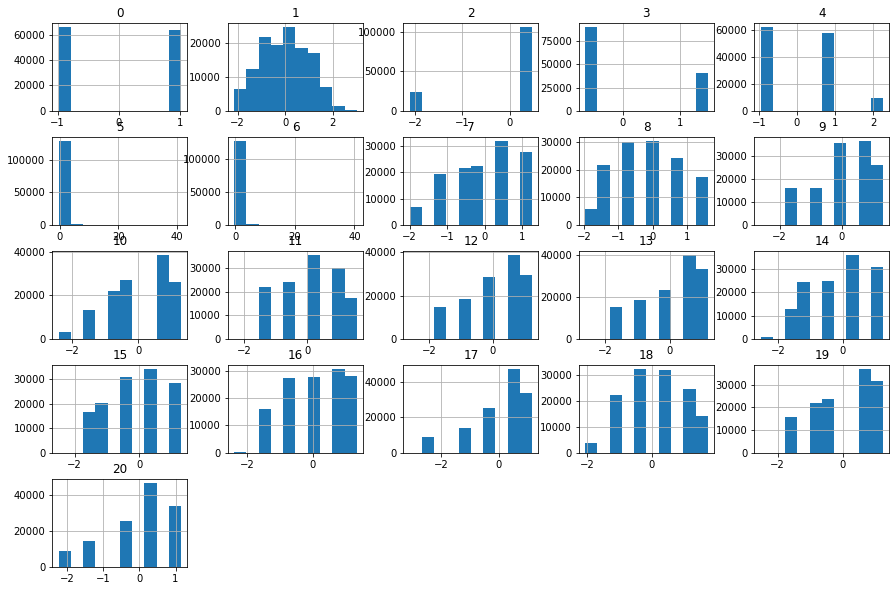

In [33]:
d.hist(figsize=(15,10))
plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 4)

In [196]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8747550415584666
0.8738512626457642


In [49]:
kNN = KNeighborsClassifier(n_neighbors=7)

In [50]:
kNN.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [51]:
kNN.score(X_train , y_train)

0.9462587726496057

In [52]:
kNN.score(X_test, y_test)

0.9308826936442969

In [53]:
yhat = kNN.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.069


# WITH Decision Tree 

In [54]:
from sklearn.tree  import DecisionTreeClassifier

In [81]:
model_T =DecisionTreeClassifier(max_depth=15)

In [82]:
model_T.fit(X_train , y_train)
model_T.score(X_train , y_train)

0.9731052524881986

In [83]:
model_T.score(X_test , y_test)

0.954475249053981

In [84]:
yhat = model_T.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.046


# WITH Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf = RandomForestClassifier(max_depth=14)

In [96]:
rf.fit(X_train , y_train)
rf.score(X_train , y_train)

0.9715413798762417

In [97]:
rf.score(X_test , y_test)

0.9587999073287512

In [98]:
yhat = model_T.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.046


we will just check if there any bias for any of our labels

In [78]:
#conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [41]:
#!pip install imbalanced-learn==0.9.0

In [77]:
#pip install scikit-learn==1.0 -U

Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier


classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train , y_train)
preds = classifier.predict(X_test)

In [36]:
classifier.score(X_train , y_train)

0.9970653349122175

In [37]:
classifier.score(X_test , y_test)

0.9587297664648462

In [39]:
from sklearn.metrics import mean_absolute_error
preds = classifier.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print('MAE: %.3f' % mae)

MAE: 0.041


In [ ]:
#we can see that our error decrease abit